# Homework 4 - Group 29 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cvx
from cvxpy import *

%matplotlib inline
%config InlineBackend.figure_format = 'svg'

# Question 1

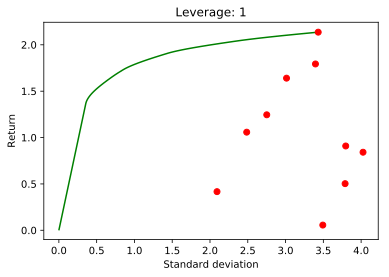

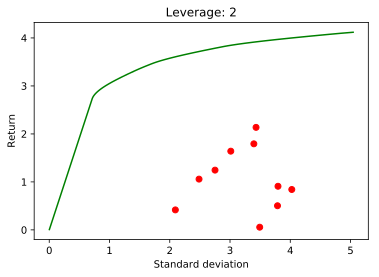

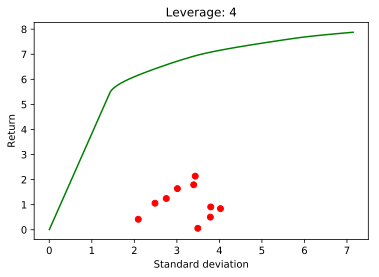

In [231]:
np.random.seed(2)
L_vals = [1,2,4]

'''Step 1'''
n = 10
mu = np.abs(np.random.randn(n, 1))
Sigma = np.random.randn(n, n)
Sigma = Sigma.T.dot(Sigma)

'''Step 2'''
for L in L_vals:

    w = Variable(n)
    gamma = Parameter(sign='positive') # gamma = Parameter(nonneg=True)
    ret = mu.T*w
    risk = quad_form(w, Sigma)
    prob = Problem(Maximize(ret - gamma*risk),
                   [cvx.norm(w,1) <= L,w >= 0])

    '''Step 3'''
    SAMPLES = 100
    risk_data = np.zeros(SAMPLES)
    ret_data = np.zeros(SAMPLES)
    gamma_vals = np.logspace(-2, 3, num=SAMPLES)
   
    for i in range(SAMPLES):
        gamma.value = gamma_vals[i]
        prob.solve()
        risk_data[i] = sqrt(risk).value
        ret_data[i] = ret.value

    markers_on = [29, 40]
    fig = plt.figure()
    ax = fig.add_subplot(111)
    plt.plot(risk_data, ret_data, 'g-')
    
    #for marker in markers_on:
    #    plt.plot(risk_data[marker], ret_data[marker], 'bs')
    #    ax.annotate(r"$\gamma = %.2f$" % gamma_vals[marker], xy=(risk_data[marker]+.08, ret_data[marker]-.03))
    
    for i in range(n):
        plt.plot(sqrt(Sigma[i,i]).value, mu[i], 'ro')
        plt.xlabel('Standard deviation')
        plt.ylabel('Return')
        plt.title("Leverage: {}".format(str(L)))
    plt.show()





# Question 2

In [233]:
np.random.seed(1)
n = 5
mu = np.abs(np.random.randn(n, 1))/15
Sigma = np.random.uniform(-.15, .8, size=(n, n))
Sigma_nom = Sigma.T.dot(Sigma)

print ("Sigma_nom =")
print (np.round(Sigma_nom, decimals=2))


Sigma_nom =
[[1.16 0.65 0.16 0.46 0.85]
 [0.65 0.97 0.43 0.82 0.55]
 [0.16 0.43 0.76 0.37 0.42]
 [0.46 0.82 0.37 0.85 0.45]
 [0.85 0.55 0.42 0.45 1.21]]


In [242]:
np.random.seed(1)
delta = np.random.uniform(-0.2 ,0.2
                          ,size = (n, n))

for i in range(delta.shape[0]):
    delta[i][i]=0   
    
print("Delta= \n", np.round(delta,2))    
S  = np.add(Sigma_nom, delta)
print("\n S= \n", np.round(S,2))

w = Variable(n)
ret = mu.T*w
risk = quad_form(w, S)
prob = Problem(Minimize(risk),
               [sum_entries(w) == 1,
                ret >= 0.1,
                norm(w, 1) <= 2])
prob.solve()

print("\n\nSolution:")
print("w =")
print(np.round(w.value, decimals=2))

Delta= 
 [[ 0.    0.09 -0.2  -0.08 -0.14]
 [-0.16  0.   -0.06 -0.04  0.02]
 [-0.03  0.07  0.    0.15 -0.19]
 [ 0.07 -0.03  0.02  0.   -0.12]
 [ 0.12  0.19 -0.07  0.08  0.  ]]

 S= 
 [[ 1.16  0.74 -0.04  0.38  0.71]
 [ 0.49  0.97  0.37  0.78  0.57]
 [ 0.13  0.5   0.76  0.52  0.23]
 [ 0.53  0.78  0.39  0.85  0.33]
 [ 0.98  0.74  0.34  0.53  1.21]]


Solution:
w =
[[ 0.66]
 [-0.5 ]
 [ 0.31]
 [ 0.53]
 [-0.  ]]
